# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.


## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [0]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from google.colab import drive
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Dense, Concatenate, UpSampling2D, Conv2D, Reshape, Conv2DTranspose, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import preprocess_input

In [3]:
tf.__version__

'2.2.0-rc3'

In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [5]:
%cd "drive/My Drive/Colab Notebooks/FaceDetection"

/content/drive/My Drive/Colab Notebooks/FaceDetection


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
#!wget https://olympus.greatlearning.in/courses/5661/files/765701/download?wrap=1 --quiet

In [7]:
#!cp '/content/drive/My Drive/Colab Notebooks/FaceDetection/WIDER_train.zip' .
!cp '/content/drive/My Drive/Colab Notebooks/FaceDetection/images (1).npy' .

cp: '/content/drive/My Drive/Colab Notebooks/FaceDetection/images (1).npy' and './images (1).npy' are the same file


In [18]:
!ls -l

total 2756761
-rw------- 1 root root     376506 Apr 25 07:33  AdvancedCompVision_R10_Project-Tanmay.ipynb
-rw------- 1 root root       5075 Apr 24 09:22 'download?wrap=1'
-rw------- 1 root root 1356868279 Apr 25 05:21 'images (1).npy'
-rw------- 1 root root      69719 Apr 24 06:44 'open?id=1-Etq8Q25Ot6nYSH15gxedCe6uQTRKrko'
-r-------- 1 root root 1465602149 Feb 22  2018  WIDER_train.zip


In [0]:
data = np.load('images (1).npy', allow_pickle=True)

In [63]:
data.shape

(409, 2)

In [0]:
#data = #### Add your code here ####
#data = np.zeros((100, 224,224))

### Check one sample from the loaded "images.npy" file  (2 marks)

In [64]:
data[4][0]

array([[[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [190, 201, 107],
        [193, 204, 110],
        [193, 204, 108]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [191, 203, 105],
        [192, 204, 106],
        [193, 205, 105]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [187, 200,  94],
        [184, 197,  91],
        [185, 198,  90]],

       ...,

       [[191, 191, 203],
        [170, 170, 182],
        [167, 167, 177],
        ...,
        [ 24,  41,  71],
        [ 14,  33,  66],
        [  7,  27,  64]],

       [[190, 190, 202],
        [172, 172, 184],
        [170, 170, 182],
        ...,
        [ 33,  50,  80],
        [ 17,  36,  69],
        [  5,  25,  62]],

       [[189, 191, 204],
        [172, 174, 187],
        [169, 171, 183],
        ...,
        [ 44,  63,  95],
        [ 28,  48,  83],
        [ 14,  36,  75]]

In [65]:
data[4][1]

[{'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5586206896551724, 'y': 0.19938650306748465},
   {'x': 0.6603448275862069, 'y': 0.3773006134969325}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.38620689655172413, 'y': 0.18711656441717792},
   {'x': 0.4896551724137931, 'y': 0.4049079754601227}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.1724137931034483, 'y': 0.23006134969325154},
   {'x': 0.2775862068965517, 'y': 0.44171779141104295}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7155172413793104, 'y': 0.19938650306748465},
   {'x': 0.8448275862068966, 'y': 0.41411042944785276}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.2982758620689655, 'y': 0.44171779141104295},
   {'x': 0.4189655172413793, 'y': 0.65337423

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224 #### Add your code here ####
IMAGE_HEIGHT = 224 #### Add your code here ####

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        #print(x1, x2, y1, y2)
        masks[index][y1:y2, x1:x2] = 1
        #print(masks[index])

### Print the shape of X_train and mask array  (1 mark)

In [68]:
X_train.shape

(409, 224, 224, 3)

In [69]:
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


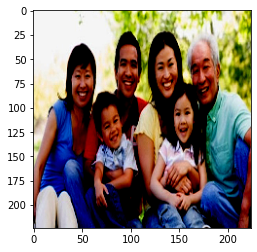

In [70]:
n = 4
#print(X_train[n])
pyplot.imshow(X_train[n])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


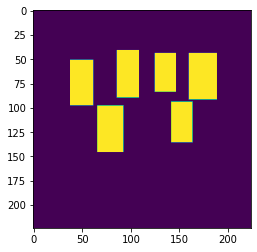

In [71]:
print(masks[6])
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
def create_model(trainable=True):

    alpha = 1.0
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=alpha, weights='imagenet')
    
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here

    # Using Mobilenet as Downscaling

    # Creating below layers for Upscaling
    block13 = model.get_layer("conv_pw_13_relu").output
    x = block13

    # Upsampling from block 13 to block 12
    x = Conv2DTranspose(int(1024 * alpha), (3, 3), strides=(1, 1), padding='same', use_bias=False)(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)  
    block12 = model.get_layer("conv_pw_12_relu").output
    x = Concatenate()([x, block12])
    x = Conv2D(1024, (1, 1), strides=(1, 1), padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Upsampling from block 12 to block 11
    x = Conv2DTranspose(int(512 * alpha), (3, 3), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    block11 = model.get_layer("conv_pw_11_relu").output
    x = Concatenate()([x, block11])
    x = Conv2D(512, (1, 1), strides=(1, 1), padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Upsampling from block 11 to block 10
    x = Conv2DTranspose(int(512 * alpha), (3, 3), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    block10 = model.get_layer("conv_pw_10_relu").output
    x = Concatenate()([x, block10])
    x = Conv2D(512, (1, 1), strides=(1, 1), padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 

    # Upsampling from block 10 to block 9
    x = Conv2DTranspose(int(512 * alpha), (3, 3), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    block9 = model.get_layer("conv_pw_9_relu").output
    x = Concatenate()([x, block9])
    x = Conv2D(512, (1, 1), strides=(1, 1), padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 

    # Upsampling from block 9 to block 8
    x = Conv2DTranspose(int(512 * alpha), (3, 3), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    block8 = model.get_layer("conv_pw_8_relu").output
    x = Concatenate()([x, block8])
    x = Conv2D(512, (1, 1), strides=(1, 1), padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)   

    # Upsampling from block 8 to block 7
    x = Conv2DTranspose(int(512 * alpha), (3, 3), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    block7 = model.get_layer("conv_pw_7_relu").output
    x = Concatenate()([x, block7])
    x = Conv2D(512, (1, 1), strides=(1, 1), padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 

    # Upsampling from block 7 to block 6
    x = Conv2DTranspose(int(512 * alpha), (3, 3), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    block6 = model.get_layer("conv_pw_6_relu").output
    x = Concatenate()([x, block6])
    x = Conv2D(512, (1, 1), strides=(1, 1), padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)   

    # Upsampling from block 6 to block 5
    x = Conv2DTranspose(int(256 * alpha), (3, 3), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    block5 = model.get_layer("conv_pw_5_relu").output
    x = Concatenate()([x, block5])
    x = Conv2D(256, (1, 1), strides=(1, 1), padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 

    # Upsampling from block 5 to block 4
    x = Conv2DTranspose(int(256 * alpha), (3, 3), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    block4 = model.get_layer("conv_pw_4_relu").output
    x = Concatenate()([x, block4])
    x = Conv2D(256, (1, 1), strides=(1, 1), padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Upsampling from block 4 to block 3
    x = Conv2DTranspose(int(128 * alpha), (3, 3), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    block3 = model.get_layer("conv_pw_3_relu").output
    x = Concatenate()([x, block3])
    x = Conv2D(128, (1, 1), strides=(1, 1), padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Upsampling from block 3 to block 2
    x = Conv2DTranspose(int(128 * alpha), (3, 3), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    block2 = model.get_layer("conv_pw_2_relu").output
    x = Concatenate()([x, block2])
    x = Conv2D(128, (1, 1), strides=(1, 1), padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Upsampling from block 2 to block 1
    x = Conv2DTranspose(int(64 * alpha), (3, 3), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    block1 = model.get_layer("conv_pw_1_relu").output
    x = Concatenate()([x, block1])
    x = Conv2D(64, (1, 1), strides=(1, 1), padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Upsampling from block 1 to conv 1
    x = Conv2DTranspose(int(32 * alpha), (3, 3), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    conv1 = model.get_layer("conv1_relu").output
    x = Concatenate()([x, conv1])
    x = Conv2D(32, (1, 1), strides=(1, 1), padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2DTranspose(int(32 * alpha), (3, 3), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = Concatenate()([UpSampling2D()(block3), block2])
    #print(type(x))
    #print(type(block3))
    #print(type(model.get_layer("conv_pw_13_relu")))

    #x = Concatenate()([UpSampling2D()(x), model.get_layer("conv_pw_1_relu").output])

    # Adding below layer for final output
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((224, 224))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [73]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
____________________________________________________________________________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):

    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    print(y_true.shape, y_pred.shape)
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
model.compile(optimizer='Adam',loss=loss,metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [77]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [99]:
model.fit(x=X_train, y=masks, epochs=16, batch_size=1, callbacks=[checkpoint, reduce_lr, stop])

Epoch 1/16
(1, 224, 224) (1, 224, 224)
(1, 224, 224) (1, 224, 224)
409/409 [==============================] - ETA: 0s - loss: 0.9305 - dice_coefficient: 0.5657
Epoch 00001: loss improved from 1.21770 to 0.93051, saving model to model-0.93.h5
409/409 [==============================] - 48s 117ms/step - loss: 0.9305 - dice_coefficient: 0.5657 - lr: 0.0010
Epoch 2/16
409/409 [==============================] - ETA: 0s - loss: 0.8295 - dice_coefficient: 0.6047
Epoch 00002: loss improved from 0.93051 to 0.82948, saving model to model-0.83.h5
409/409 [==============================] - 48s 117ms/step - loss: 0.8295 - dice_coefficient: 0.6047 - lr: 0.0010
Epoch 3/16
409/409 [==============================] - ETA: 0s - loss: 0.7671 - dice_coefficient: 0.6299
Epoch 00003: loss improved from 0.82948 to 0.76715, saving model to model-0.77.h5
409/409 [==============================] - 48s 117ms/step - loss: 0.7671 - dice_coefficient: 0.6299 - lr: 0.0010
Epoch 4/16
409/409 [===========================

### Get the predicted mask for a sample image   (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


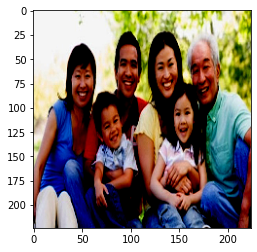

In [100]:
n = 4
sample_image = X_train[n]
pyplot.imshow(sample_image)

### Impose the mask on the image (3 marks)

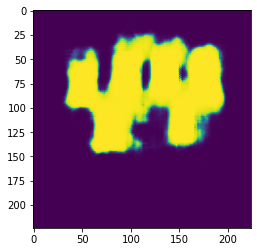

In [101]:
resized_sample_image = np.expand_dims(sample_image, axis=0)
mask = model.predict(resized_sample_image)
mask = np.reshape(mask, (224,224))
pyplot.imshow(mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


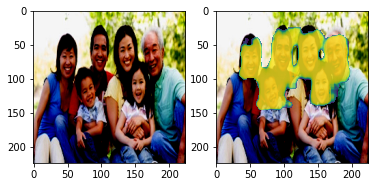

In [102]:
masked = np.ma.masked_where(mask < 0.1, mask)

pyplot.figure()
pyplot.subplot(1,2,1)
pyplot.imshow(sample_image)
pyplot.subplot(1,2,2)
pyplot.imshow(sample_image)
pyplot.imshow(masked, alpha=0.8)
pyplot.show()